In [2]:
import numpy as np
from pandas_datareader import data as wb
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Nome das ações
#acoes = ['MGLU3.SA','ABEV3.SA','CIEL3.SA']

# Criamos o DataFrame vazio
#new_data = pd.DataFrame()

# Preenchemos o DataFrame com os dados das ações
#for a in acoes:
    #new_data[a] = wb.DataReader(a, data_source='yahoo', start=inicio)['Adj Close']

In [4]:
#MGLU3.SA
#ABEV3.SA
#CIEL3.SA

# Datas
inicio = dt.date(2019,1,10)
fim = dt.date(2022,2,2)

In [5]:
MGLU3 = wb.DataReader('MGLU3.SA', data_source='yahoo', start=inicio)
#ABEV3 = wb.DataReader('ABEV3.SA', data_source='yahoo', start=inicio)
#CIEL3 = wb.DataReader('CIEL3.SA', data_source='yahoo', start=inicio)

In [6]:
MGLU3.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-31,7.11,6.67,6.80,7.00,149358700.0,7.00
2022-02-01,7.33,6.88,7.00,7.01,154376100.0,7.01
2022-02-02,7.25,6.44,7.09,6.51,208153600.0,6.51
2022-02-03,6.85,6.34,6.60,6.53,165148300.0,6.53
2022-02-04,6.60,6.20,6.55,6.31,101772900.0,6.31


## Calculando o retorno simples de ações

Melhor opção para casos em que estamos analisando o retorno de mais de 1 ação.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [7]:
MGLU3['simple_return'] = (MGLU3['Adj Close'] / MGLU3['Adj Close'].shift(1)) - 1

In [8]:
MGLU3['simple_return']

Date
2019-01-10         NaN
2019-01-11   -0.017971
2019-01-14    0.007883
2019-01-15   -0.011341
2019-01-16   -0.011132
                ...   
2022-01-31    0.043219
2022-02-01    0.001429
2022-02-02   -0.071327
2022-02-03    0.003072
2022-02-04   -0.033691
Name: simple_return, Length: 762, dtype: float64

<AxesSubplot:xlabel='Date'>

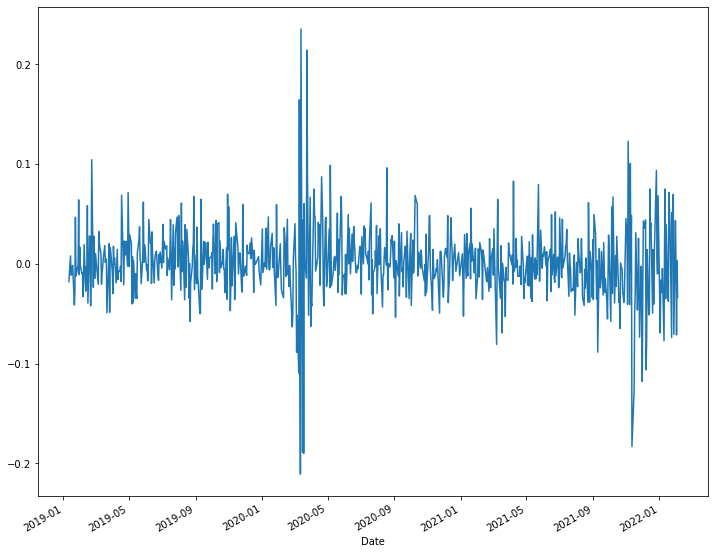

In [9]:
# Retornos diários da ação
MGLU3['simple_return'].plot(figsize=(12,10))

In [10]:
avg_returns_d = MGLU3['simple_return'].mean()
avg_returns_d

0.0008643688667395239

In [11]:
# Retorno em 250 dias úteis
avg_returns_a = MGLU3['simple_return'].mean() * 250
avg_returns_a

0.216092216684881

In [12]:
print('O retorno anual da ação '
      'MGLU3 nos últimos 2 anos foi de: {}%'.format(str(round(avg_returns_a, 5) * 100)))

O retorno anual da ação MGLU3 nos últimos 2 anos foi de: 21.609%


## Calculando o retorno com Logarítimico

Melhor opção para casos em que estamos analisando somente o retorno de 1 ação.

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [13]:
MGLU3['log_return'] = np.log(MGLU3['Adj Close'] / MGLU3['Adj Close'].shift(1))

In [14]:
MGLU3['log_return']

Date
2019-01-10         NaN
2019-01-11   -0.018134
2019-01-14    0.007852
2019-01-15   -0.011406
2019-01-16   -0.011194
                ...   
2022-01-31    0.042311
2022-02-01    0.001428
2022-02-02   -0.073998
2022-02-03    0.003067
2022-02-04   -0.034271
Name: log_return, Length: 762, dtype: float64

<AxesSubplot:xlabel='Date'>

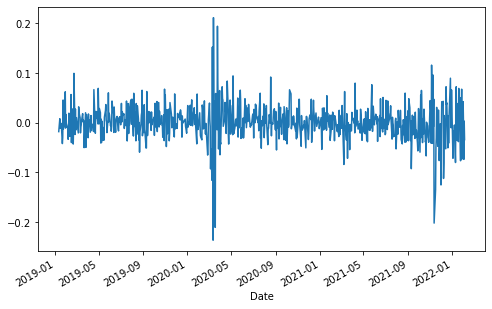

In [15]:
MGLU3['log_return'].plot(figsize=(8,5))

In [16]:
log_return_d = MGLU3['log_return'].mean()
log_return_d

0.0001839640923950051

In [17]:
log_return_a = MGLU3['log_return'].mean() * 250
log_return_a

0.04599102309875127

In [18]:
print('O retorno anual da ação '
      'MGLU3 nos últimos 2 anos foi de: {}%'.format(str(round(log_return_a, 5) * 100)))

O retorno anual da ação MGLU3 nos últimos 2 anos foi de: 4.599%
